In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
import numpy as np

In [9]:
import warnings
warnings.filterwarnings("ignore")


In [10]:
data = pd.read_csv("C:/Users/Medhansh Jindal/Downloads/tips (data for regression problem).csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
data["sex"] = LabelEncoder().fit_transform(data["sex"])
data["smoker"] = LabelEncoder().fit_transform(data["smoker"])
data["day"] = LabelEncoder().fit_transform(data["day"])
data["time"] = LabelEncoder().fit_transform(data["time"])

In [12]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [13]:
data[data.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,0,1,3,1,2


In [14]:
data.drop_duplicates(inplace=True)

<Axes: xlabel='day', ylabel='tip'>

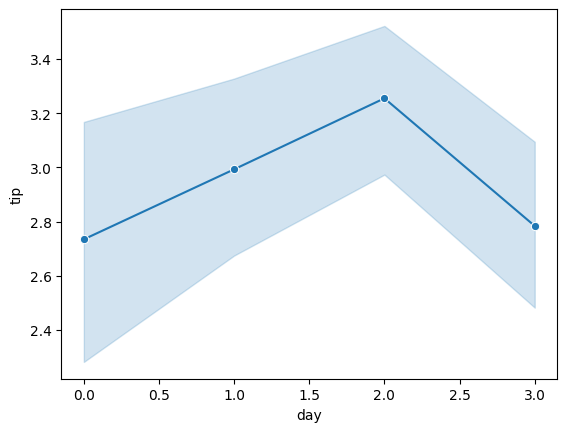

In [75]:
sns.lineplot(data=data, x = 'day', y='tip', marker='o')

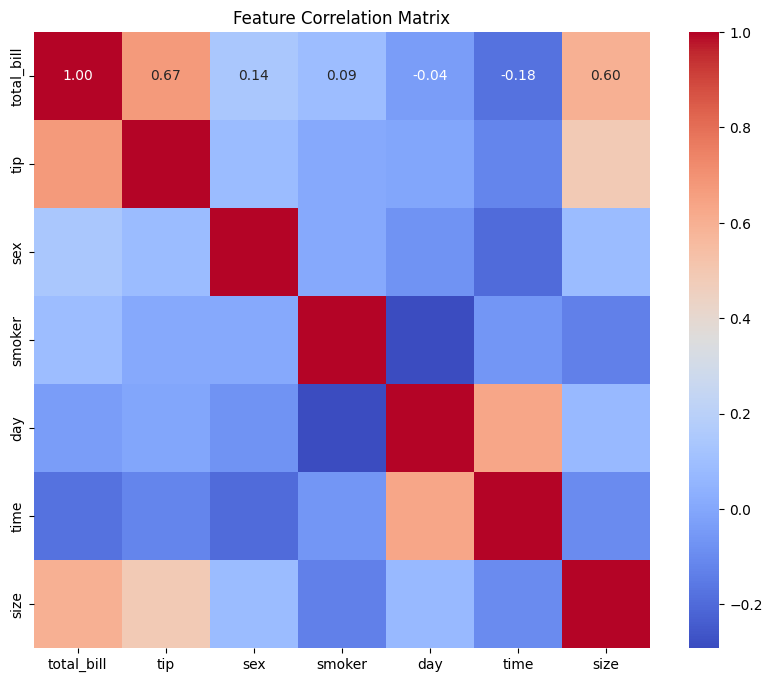

In [15]:
correlation_matrix = data.corr()

# Step 4: Plot the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

We see that maximum correlation is either between tip and Total bill or day and time 

We see that day & time doesnot affect the tipping behaviour.
Hence, we now perform our analysis on other features as predictors because we have here received a low R2 score and irrelevant features do affect the R2 score.. 

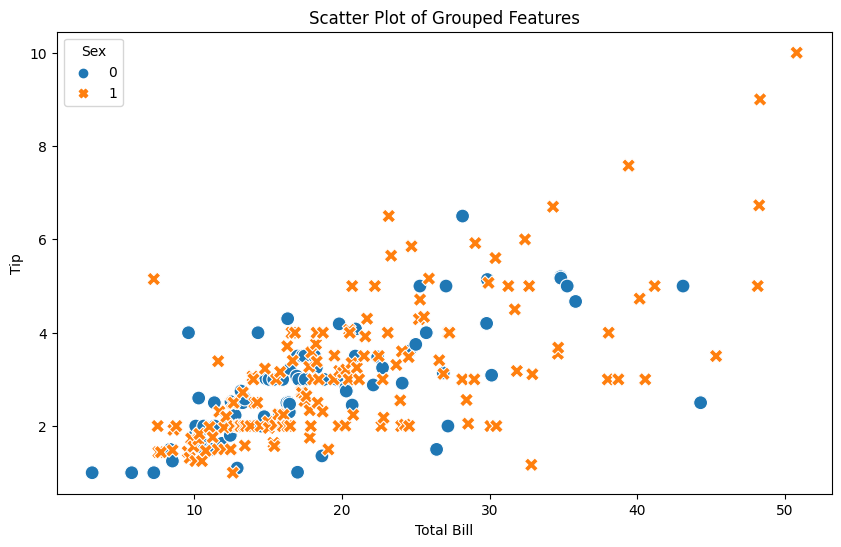

In [16]:
grouped_df = data.groupby(['sex', 'total_bill']).mean().reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='total_bill', y='tip', hue='sex', style='sex', s=100)
plt.title("Scatter Plot of Grouped Features")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend(title="Sex")
plt.show()

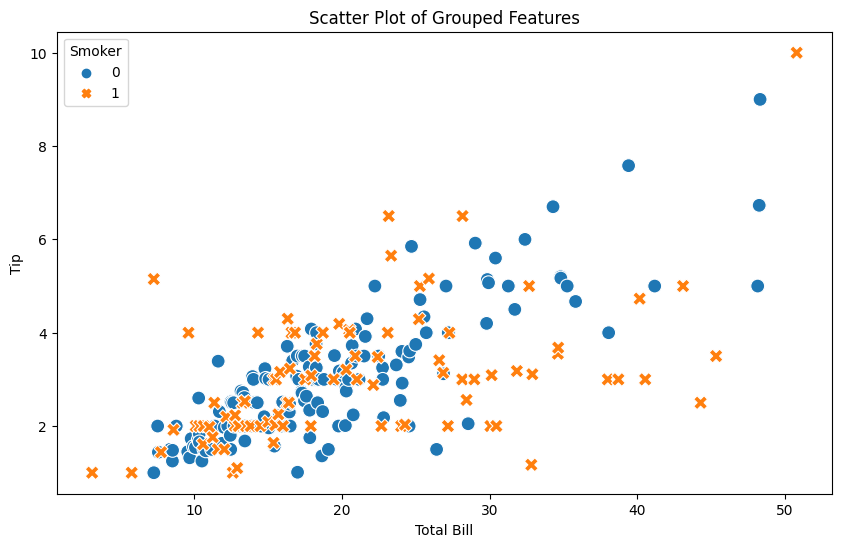

In [17]:
grouped_df = data.groupby(['smoker', 'total_bill']).mean().reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='total_bill', y='tip', hue='smoker', style='smoker', s=100)
plt.title("Scatter Plot of Grouped Features")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend(title="Smoker")
plt.show()

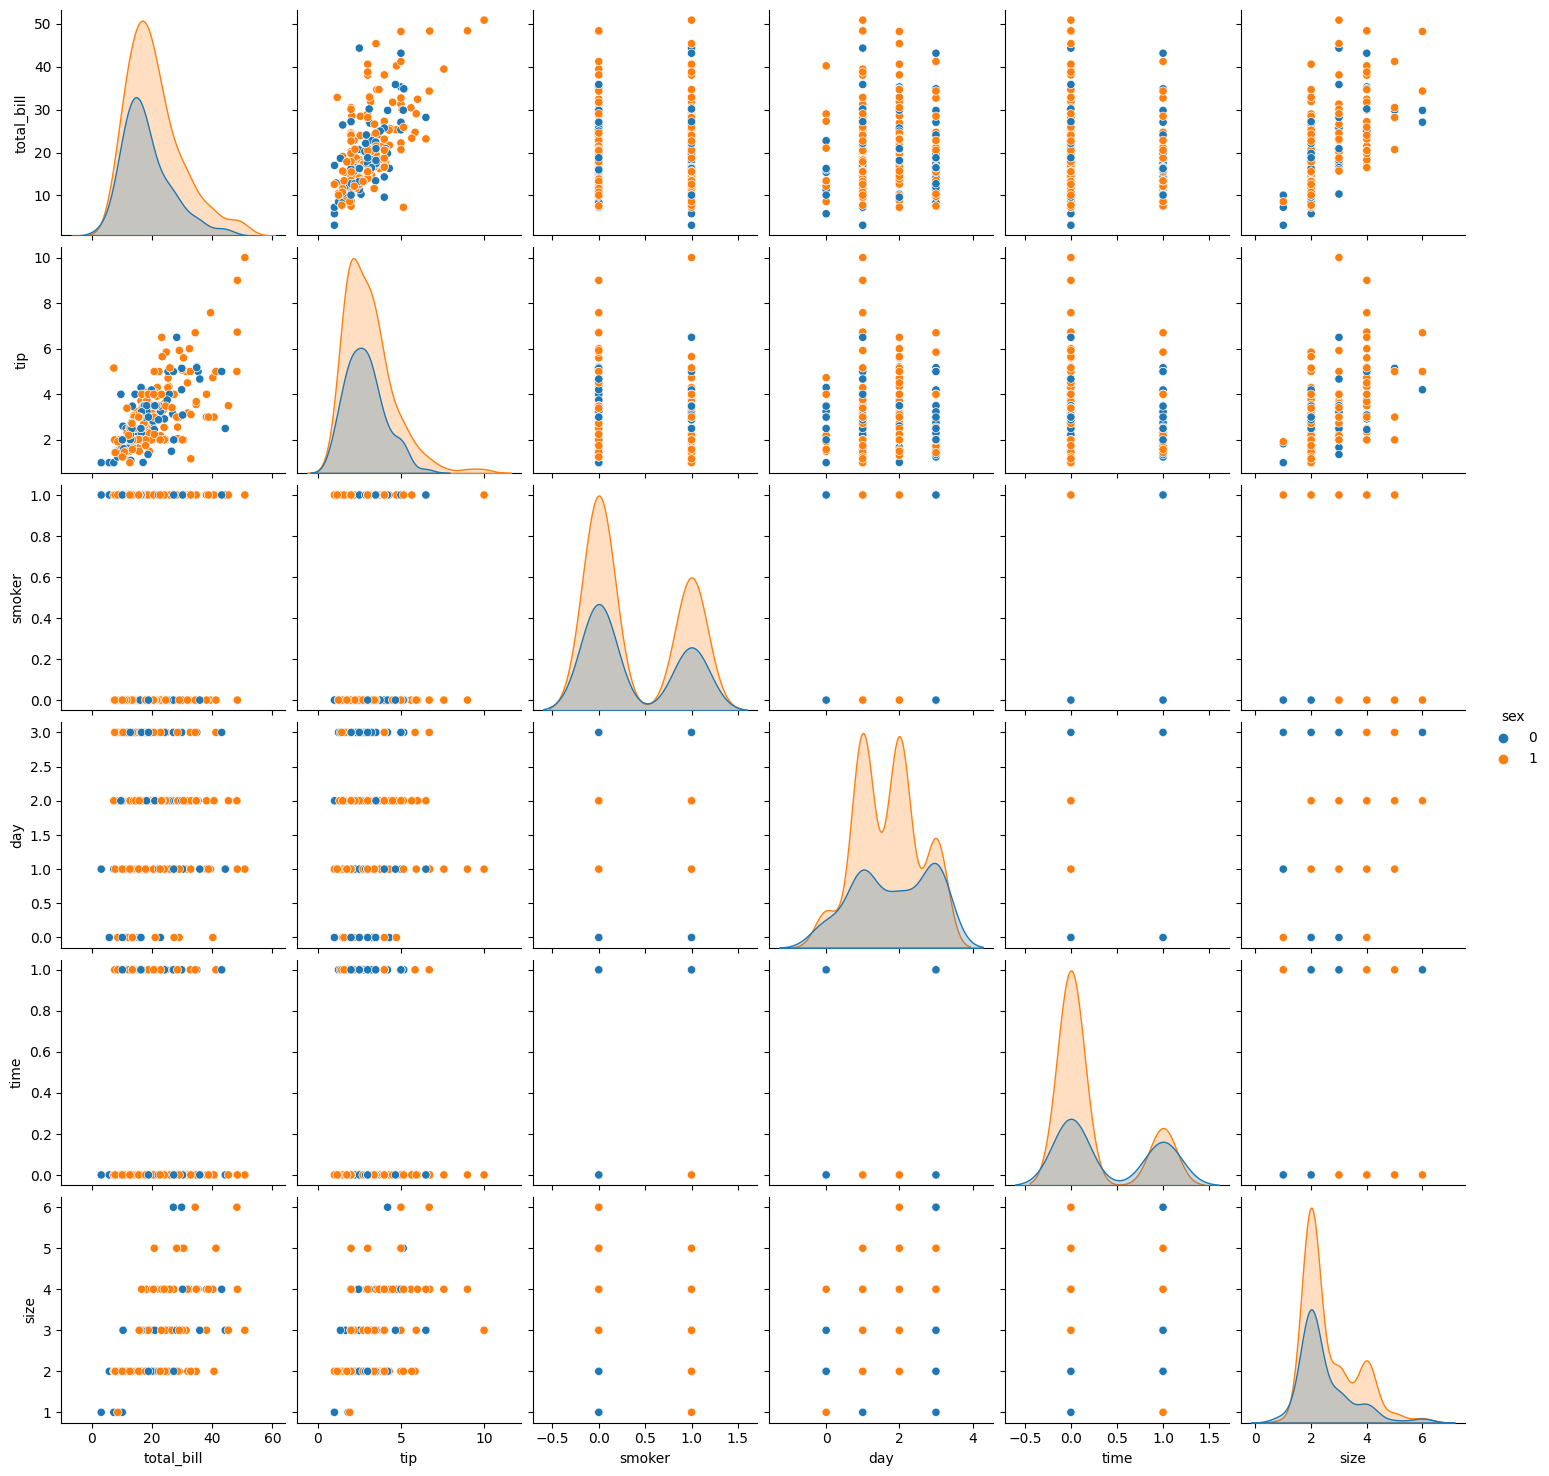

In [18]:
sns.pairplot(data=data, hue='sex')
plt.show()

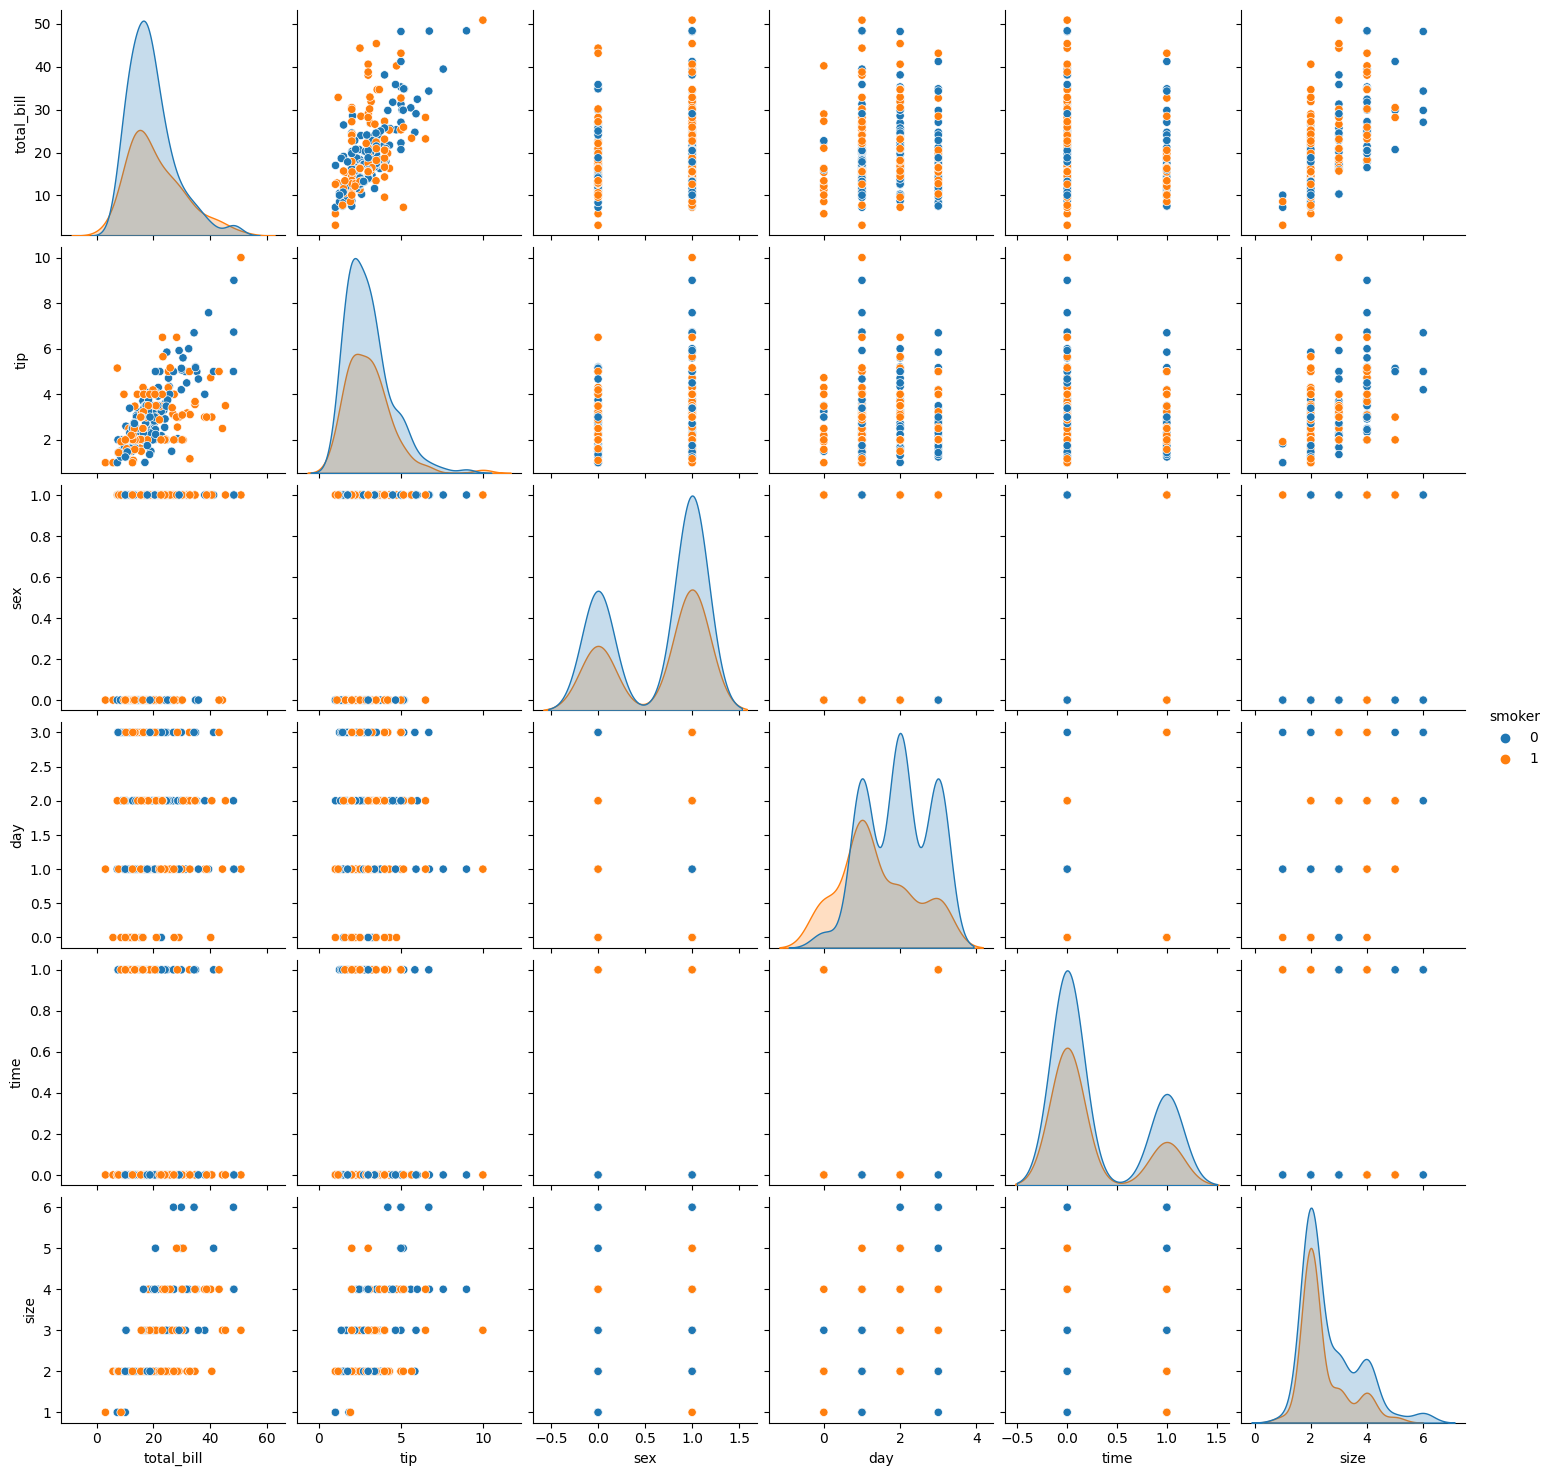

In [19]:
sns.pairplot(data=data, hue='smoker')
plt.show()

We see that day, time doesn't affect the tipping behaviour 

In [20]:
New_data = data.drop(["day","time"],axis=1)

In [21]:
New_data

,total_bill,tip,sex,smoker,size
0,16.99,1.01,0,0,2
1,10.34,1.66,1,0,3
2,21.01,3.50,1,0,3
3,23.68,3.31,1,0,2
4,24.59,3.61,0,0,4
...,...,...,...,...,...
239,29.03,5.92,1,0,3
240,27.18,2.00,0,1,2
241,22.67,2.00,1,1,2
242,17.82,1.75,1,0,2


In [22]:
new_correlation_matrix = New_data.corr()


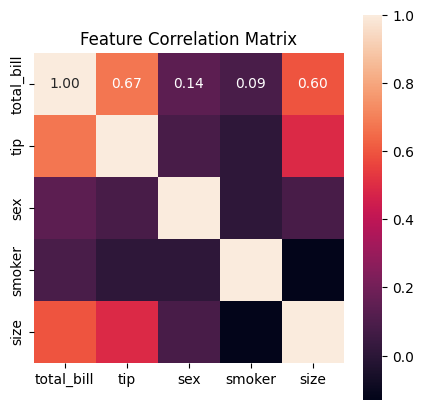

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(new_correlation_matrix, annot=True, fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

<Figure size 500x500 with 0 Axes>

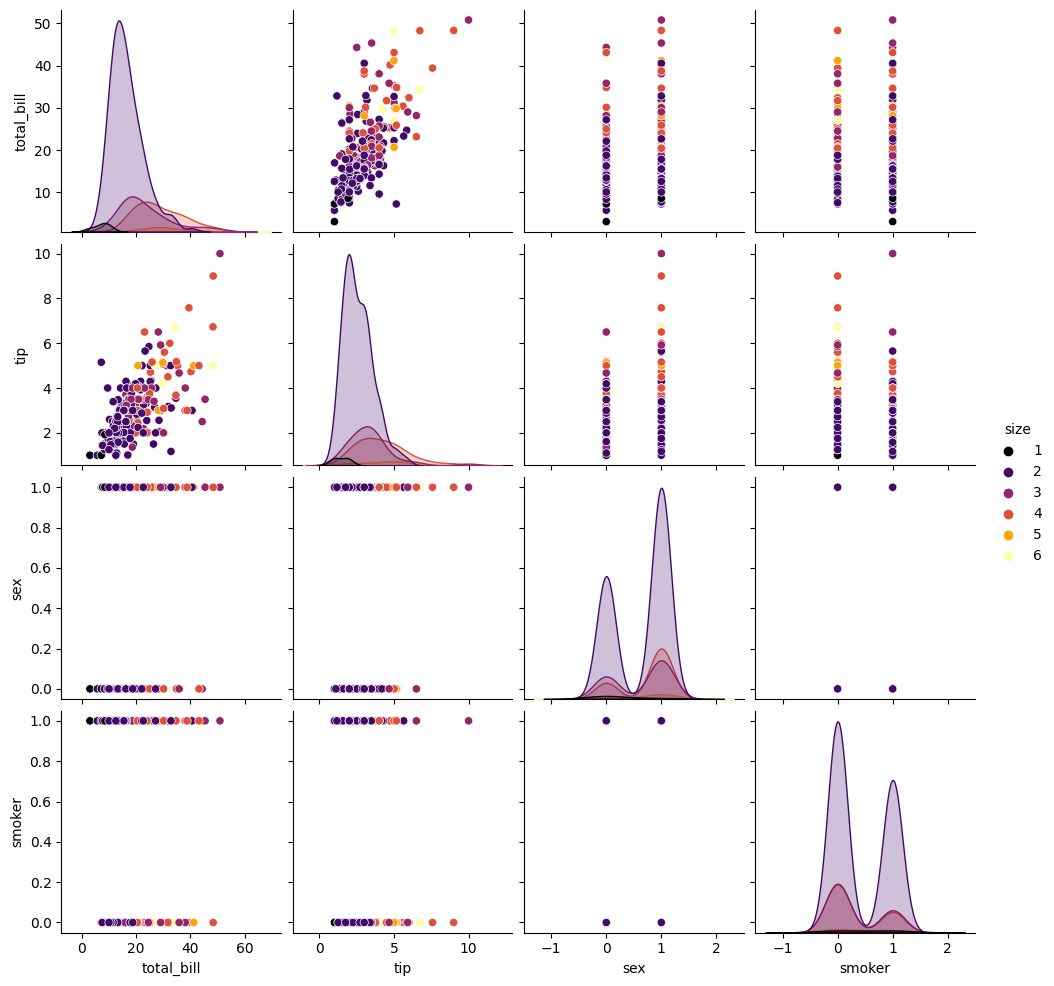

In [24]:
plt.figure(figsize=(5,5))
sns.pairplot(data=New_data, hue='size', palette='inferno')
plt.show()

In [25]:
X = New_data.drop("tip", axis=1)
y = New_data["tip"]



In [26]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.33)

In [27]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_new_train_scaled = sc_X.fit_transform(X_new_train)
X_new_test_scaled = sc_X.transform(X_new_test)
y_new_train_scaled = sc_y.fit_transform(np.array(y_new_train).reshape(-1, 1)).ravel()

In [28]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Example data
x = sm.add_constant(X)  # Add constant for intercept in the model
Y = y

# Fit a linear regression model
model = sm.OLS(Y, x).fit()

# Perform the Rainbow test
rainbow_stat, rainbow_p_value = linear_rainbow(model)

# Print the test statistic and p-value
print(f"Rainbow Test Statistic: {rainbow_stat:.3f}")
print(f"P-Value: {rainbow_p_value:.3f}")

# Interpretation
if rainbow_p_value < 0.05:
    print("Linearity assumption may be violated (reject null hypothesis).")
else:
    print("No evidence to reject linearity assumption (fail to reject null hypothesis).")


Rainbow Test Statistic: 1.309
P-Value: 0.072
No evidence to reject linearity assumption (fail to reject null hypothesis).


#### Lasso Regression 

In [41]:
LaR = Lasso(alpha=0.0005)
LaR.fit(X_new_train_scaled, y_new_train_scaled)

y_pred_LaR = LaR.predict(X_new_test_scaled)
y_pred_LaR = sc_y.inverse_transform(y_pred_LaR.reshape(-1, 1)).ravel()
print('Lasso R2:' , r2_score(y_new_test, y_pred_LaR))

Lasso R2: 0.48420925023989114


......

In [42]:
y_pred_LaR

array([2.67319496, 1.84938062, 2.09410289, 2.65619936, 2.72865323,
       2.90972437, 2.08167559, 2.28453545, 6.00652992, 2.18375042,
       3.99235091, 3.80976515, 4.23678937, 3.43262704, 2.4017062 ,
       2.17290115, 2.0327109 , 2.46978982, 3.61425685, 3.70623913,
       4.67148349, 5.16051738, 2.96128206, 2.25872489, 2.40956519,
       2.98865727, 3.14427847, 2.38129746, 3.15398594, 2.03653468,
       3.86779407, 2.61966197, 2.11322182, 1.88132413, 3.22382008,
       2.96853235, 2.45162684, 4.29360982, 2.56675105, 3.73902512,
       1.96982986, 2.58374666, 3.63713614, 3.19439717, 4.42348272,
       2.30290986, 2.83496133, 2.94333051, 3.3951459 , 5.3977913 ,
       4.97477997, 3.96176063, 2.80163901, 4.40885971, 2.79515882,
       2.16101914, 2.41857937, 2.57609909, 3.65435655, 3.56182781,
       2.71908039, 3.66042609, 2.72407155, 3.43700949, 3.20586852,
       2.10099374, 4.63931518, 2.81119848, 2.84430937, 2.82096937,
       4.93178472, 2.55656951, 2.95677717, 2.23578218, 3.99104

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
print("Mean Squared Error",mean_squared_error(y_new_test, y_pred_LaR))

Mean Squared Error 0.8864160647719812


....

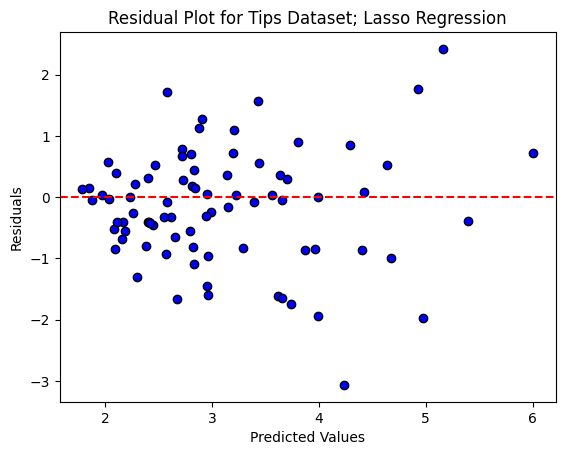

In [66]:
residuals_LaR = y_new_test - y_pred_LaR

# Plot residuals
plt.scatter(y_pred_LaR, residuals_LaR, color='blue', edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Tips Dataset; Lasso Regression')
plt.show()

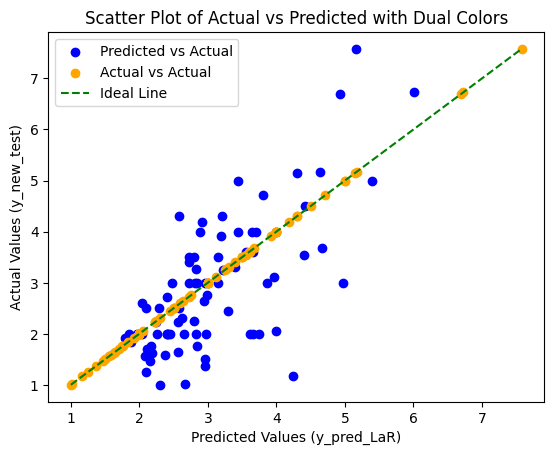

In [45]:
# Scatter plot for predicted values
plt.scatter(y_pred_LaR, y_new_test, color='blue', label='Predicted vs Actual')

# Scatter plot for actual values, using the same points but different colors to show distribution
plt.scatter(y_new_test, y_new_test, color='orange', label='Actual vs Actual')

# Add a diagonal line for reference (ideal case: y = x)
plt.plot([min(y_new_test), max(y_new_test)], [min(y_new_test), max(y_new_test)], color='green', linestyle='--', label='Ideal Line')

# Add labels and title
plt.xlabel('Predicted Values (y_pred_LaR)')
plt.ylabel('Actual Values (y_new_test)')
plt.title('Scatter Plot of Actual vs Predicted with Dual Colors')
plt.legend()

plt.show()


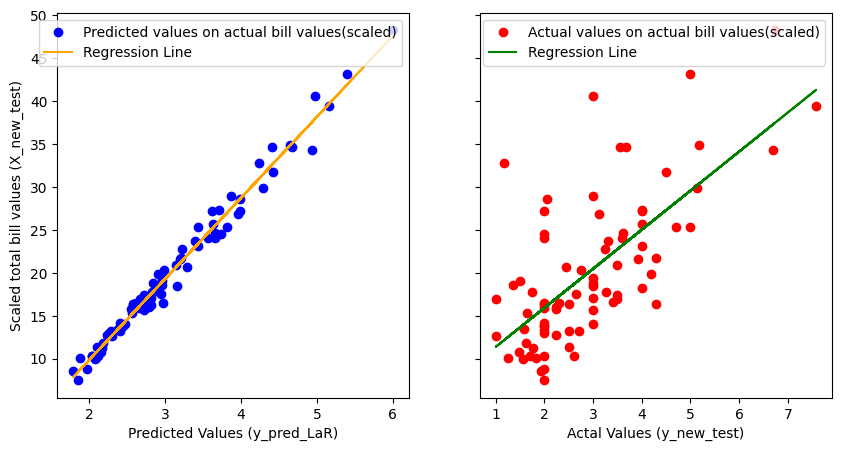

In [46]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
# Fit a regression line
slope1, intercept1 = np.polyfit(y_pred_LaR, X_new_test["total_bill"], 1)  # Linear fit (degree 1)

# Scatter plot for predicted vs actual values
ax1.scatter(y_pred_LaR, X_new_test["total_bill"], color='blue', label='Predicted values on actual bill values(scaled)')

# Plot the regression line
reg_line = slope1 * np.array(y_pred_LaR) + intercept1
ax1.plot(y_pred_LaR, reg_line, color='orange', label='Regression Line')

# Add labels and title
ax1.set_xlabel('Predicted Values (y_pred_LaR)')
ax1.set_ylabel('Scaled total bill values (X_new_test)')
ax1.legend()

slope2, intercept2 = np.polyfit(y_new_test, X_new_test["total_bill"], 1)  # Linear fit (degree 1)

# Scatter plot for predicted vs actual values
ax2.scatter(y_new_test, X_new_test["total_bill"], color='red', label='Actual values on actual bill values(scaled)')

# Plot the regression line
reg_line = slope2 * np.array(y_new_test) + intercept2
ax2.plot(y_new_test, reg_line, color='green', label='Regression Line')

# Add labels and title
ax2.set_xlabel('Actal Values (y_new_test)')
ax2.legend()

plt.show()


#### SVR

In [35]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_new_train_scaled = sc_X.fit_transform(X_new_train)
X_new_test_scaled = sc_X.transform(X_new_test)
y_new_train_scaled = sc_y.fit_transform(np.array(y_new_train).reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='linear')
svr_reg.fit(X_new_train_scaled, y_new_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_new_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_new_test, y_pred_svr))


SVR R2: 0.5108833746867072


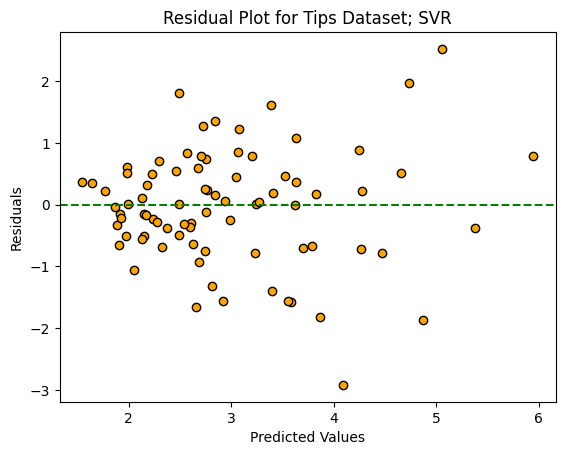

In [68]:
residuals_svr = y_new_test - y_pred_svr

# Plot residuals
plt.scatter(y_pred_svr, residuals_svr, color='orange', edgecolors='black')
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Tips Dataset; SVR')
plt.show()

#### Decision Tree

In [36]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_new_train_scaled, y_new_train_scaled)

# Predictions
y_pred_tree = tree_reg.predict(X_new_test_scaled)
y_pred_tree = sc_y.inverse_transform(y_pred_tree.reshape(-1, 1)).ravel()

# Evaluation
print('Decision Tree R2:', r2_score(y_new_test, y_pred_tree))

Decision Tree R2: 0.08742443919650678


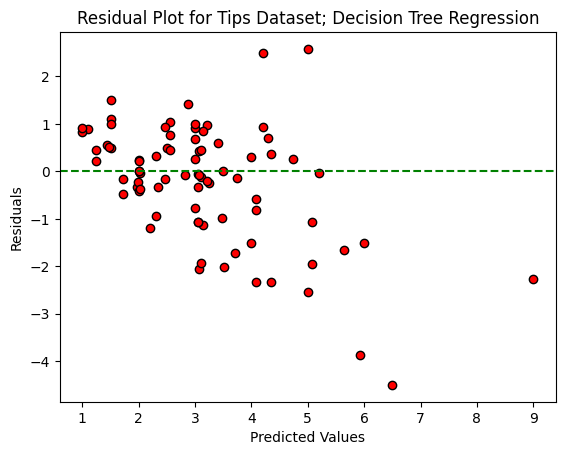

In [70]:
residuals_tree = y_new_test - y_pred_tree

# Plot residuals
plt.scatter(y_pred_tree, residuals_tree, color='red', edgecolors='black')
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Tips Dataset; Decision Tree Regression')
plt.show()

#### Random Forest Regressor

In [58]:
forest_reg = RandomForestRegressor(n_estimators=1500, random_state=0)
forest_reg.fit(X_new_train_scaled, y_new_train_scaled)

# Predictions
y_pred_forest = forest_reg.predict(X_new_test_scaled)
y_pred_forest = sc_y.inverse_transform(y_pred_forest.reshape(-1, 1)).ravel()


# Evaluation
print('Random Forest R2:', r2_score(y_new_test, y_pred_forest))

Random Forest R2: 0.4612221368650711


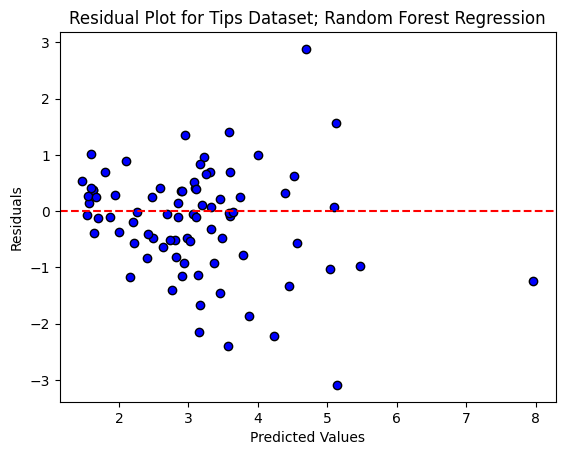

In [71]:
residuals_forest = y_new_test - y_pred_forest

# Plot residuals
plt.scatter(y_pred_forest, residuals_forest, color='blue', edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Tips Dataset; Random Forest Regression')
plt.show()

#### KNN

In [54]:
knn_reg = KNeighborsRegressor(n_neighbors=8)
knn_reg.fit(X_new_train_scaled, y_new_train_scaled)

# Predictions
y_pred_knn = knn_reg.predict(X_new_test_scaled)
y_pred_knn = sc_y.inverse_transform(y_pred_knn.reshape(-1, 1)).ravel()

# Evaluation
print('KNN Regression R2:', r2_score(y_new_test, y_pred_knn))

KNN Regression R2: 0.5632295120832277


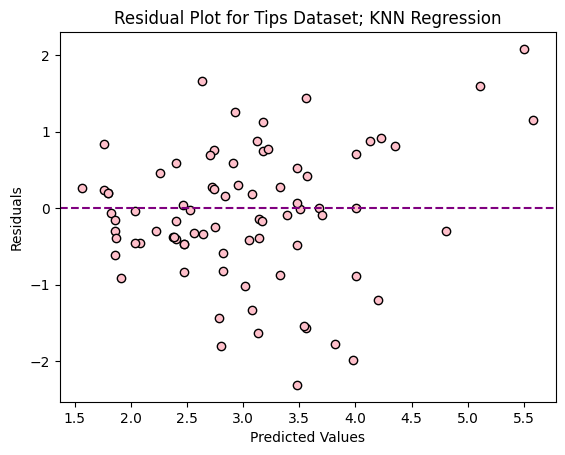

In [73]:
residuals_knn = y_new_test - y_pred_knn

# Plot residuals
plt.scatter(y_pred_knn, residuals_knn, color='pink', edgecolors='black')
plt.axhline(y=0, color='purple', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Tips Dataset; KNN Regression')
plt.show()

#### Best Estimator is KNN 

....................